In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr
#sns.set(style="darkgrid")
import sys
sys.path.append('./..')
from refuelplot import *
setup()

import statsmodels.api as sm

In [2]:
rp_usa = '/data/users/kgruber/results/USA'
rp_usa2 = '/data/users/kgruber/results/USA/results_GWA2'
rp_bra = '/data/users/kgruber/results/BRA'
rp_bra2 = '/data/users/kgruber/results/BRA/results_GWA2'

# load USA

load number gridpoints of regions USA

In [13]:
nums_usa = pd.read_csv(rp_usa + '/number_grid_points.csv',index_col=0).drop([2,59]) # drop 2,59 - what is it? new england?

In [7]:
# read results
results_USA = pd.read_pickle(rp_usa + '/results_USA_summary.pkl')
results_USA_tidy = pd.read_pickle(rp_usa + '/results_USA_tidy_summary.pkl')

# load BRA

load correlations regions BRA

In [11]:
nums_bra = pd.read_csv(rp_bra + '/number_grid_points.csv',index_col=0)

In [8]:
# read results
results_BRA = pd.read_pickle(rp_bra + '/results_BRA_summary.pkl')
results_BRA_tidy = pd.read_pickle(rp_bra + '/results_BRA_tidy_summary.pkl')

# prepare results and correlations for analysis

### merge results

In [9]:
results = pd.concat([results_BRA,results_USA],axis=0)

### prepare size parameter

In [14]:
nums_usa['scale'] = nums_usa.region.map(pd.Series(results_USA.index.get_level_values(1)).groupby(results_USA.index.get_level_values(3)).first()).values
nums_usa['scale'] = nums_usa.scale.fillna('state')
nums_usa['country'] = 'USA'
nums_bra['country'] = 'BRA'

In [28]:
# calculate "system size" as number between 0 and 1 by divinding by largest number of grid cells per dataset (usa)
ss_usa = nums_usa.copy()
ss_bra = nums_bra.copy()
ss_usa.loc[ss_usa.dataset=='MERRA2','cor'] = nums_usa.cor[nums_usa.dataset=='MERRA2']/nums_usa.cor[nums_usa.dataset=='MERRA2'].max()
ss_usa.loc[ss_usa.dataset=='ERA5','cor'] = nums_usa.cor[nums_usa.dataset=='ERA5']/nums_usa.cor[nums_usa.dataset=='ERA5'].max()
ss_bra.loc[ss_bra.dataset=='MERRA2','cor'] = nums_bra.cor[nums_bra.dataset=='MERRA2']/nums_bra.cor[nums_bra.dataset=='MERRA2'].max()
ss_bra.loc[ss_bra.dataset=='ERA5','cor'] = nums_bra.cor[nums_bra.dataset=='ERA5']/nums_bra.cor[nums_bra.dataset=='ERA5'].max()

# plot results

add correlations to results

In [35]:
results_BRA_tidy2 = results_BRA_tidy.copy(deep=True)
results_BRA_tidy2['ds'] = results_BRA_tidy2.dataset.copy()
results_BRA_tidy2['dataset'] = results_BRA_tidy2.ds.map(pd.Series(['ERA5','ERA5','MERRA2','MERRA2'],
                                                                  index=['ERA5','ERA5_GWA','MERRA2','MERRA2_GWA']))

In [36]:
results_BRA_tidy2['systemsize'] = (results_BRA_tidy2.set_index(['country','scale','region','temp','dataset']).index.map(ss_bra.set_index(['country','scale','region','temp','dataset']).cor))

In [37]:
results_USA_tidy2 = results_USA_tidy.copy(deep=True)
results_USA_tidy2['ds'] = results_USA_tidy2.dataset.copy()
results_USA_tidy2['dataset'] = results_USA_tidy2.ds.map(pd.Series(['ERA5','ERA5','MERRA2','MERRA2'],
                                                                  index=['ERA5','ERA5_GWA','MERRA2','MERRA2_GWA']))

In [38]:
results_USA_tidy2['systemsize'] = results_USA_tidy2.set_index(['country','scale','region','dataset']).index.map(ss_usa.set_index(['country','scale','region','dataset']).cor)

In [39]:
results = pd.concat([results_USA_tidy2,results_BRA_tidy2])

In [40]:
results.to_pickle('/data/users/kgruber/results/results_USABRA_gridpoints.pkl')

# correlations

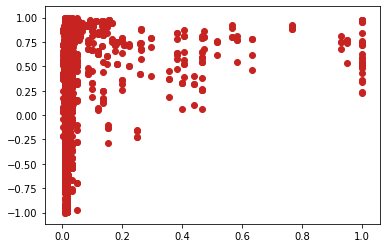

In [41]:
ds = results[results.param=='cor'].dropna(axis=0)
plt.scatter(ds.systemsize,ds.value)

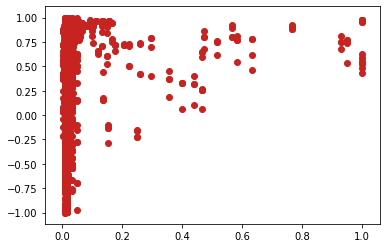

In [42]:
ds = results[(results.param=='cor')&(results.temp=='m')].dropna(axis=0)
plt.scatter(ds.systemsize,ds.value)

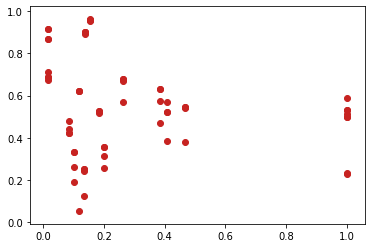

In [43]:
ds = results[(results.param=='cor')&(results.temp=='h')&(results.scale!='park')].dropna(axis=0)
plt.scatter(ds.systemsize,ds.value)

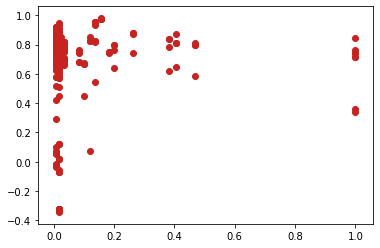

In [44]:
ds = results[(results.param=='cor')&(results.temp=='d')].dropna(axis=0)
plt.scatter(ds.systemsize,ds.value)

# RMSES

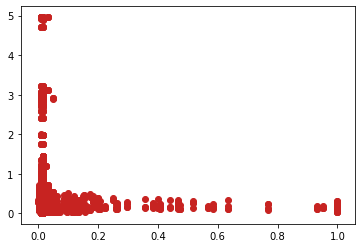

In [48]:
ds = results[results.param=='rmse'].dropna(axis=0)
plt.scatter(ds.systemsize,ds.value)

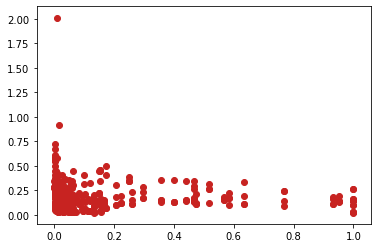

In [49]:
ds = results[(results.param=='rmse')&(results.temp=='m')&(results.scale!='park')].dropna(axis=0)
plt.scatter(ds.systemsize,ds.value)

Text(0, 0.5, 'RMSE')

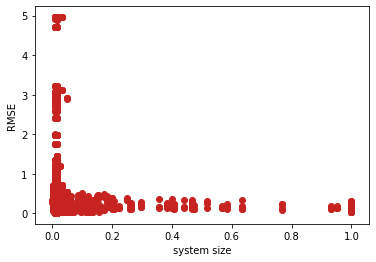

In [50]:
ds = results[results.param=='rmse'].dropna(axis=0)
plt.scatter(ds.systemsize,ds.value)
plt.xlabel('system size')
plt.ylabel('RMSE')

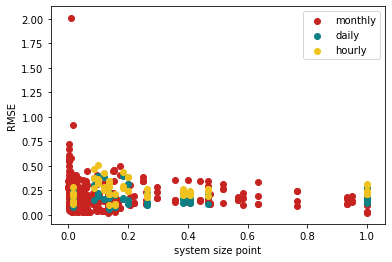

In [81]:
ds1 = results[(results.param=='rmse')&(results.temp=='m')&(results.scale!='park')].dropna(axis=0)
ds2 = results[(results.param=='rmse')&(results.temp=='d')&(results.scale!='park')].dropna(axis=0)
ds3 = results[(results.param=='rmse')&(results.temp=='h')&(results.scale!='park')].dropna(axis=0)
plt.scatter(ds1.systemsize,ds1.value,label='monthly')
plt.scatter(ds2.systemsize,ds2.value,label='daily')
plt.scatter(ds3.systemsize,ds3.value,label='hourly')
plt.xlabel('system size point')
plt.ylabel('RMSE')
plt.legend()

In [58]:
resultsCOR = pd.read_pickle('/data/users/kgruber/results/results_USABRA.pkl')

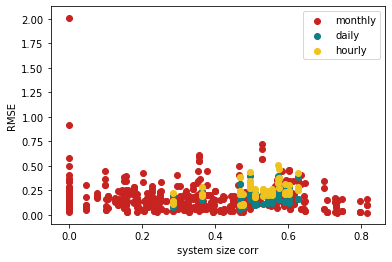

In [83]:
ds1 = resultsCOR[(resultsCOR.param=='rmse')&(resultsCOR.temp=='m')&(results.scale!='park')].dropna(axis=0)
ds2 = resultsCOR[(resultsCOR.param=='rmse')&(resultsCOR.temp=='d')&(results.scale!='park')].dropna(axis=0)
ds3 = resultsCOR[(resultsCOR.param=='rmse')&(resultsCOR.temp=='h')&(results.scale!='park')].dropna(axis=0)
plt.scatter(ds1.system_size,ds1.value,label='monthly')
plt.scatter(ds2.system_size,ds2.value,label='daily')
plt.scatter(ds3.system_size,ds3.value,label='hourly')
plt.xlabel('system size corr')
plt.ylabel('RMSE')
plt.legend()

In [67]:
rrCOR = pd.concat([results,
                   resultsCOR.rename({'system_size':'systemsize'},axis=1).drop('corsize',axis=1)],
                  axis=0).assign(sizeparam = ['points']*len(results)+['corr']*len(resultsCOR)) 

(0, 1)

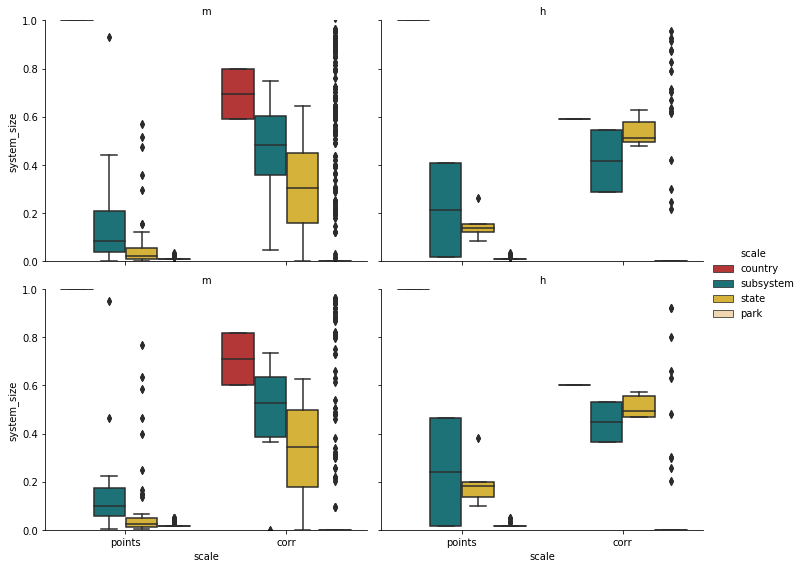

In [80]:
rmses = rrCOR[(rrCOR.param=='rmse')&(rrCOR.temp!='d')]
r = rmses.loc[rmses.drop(['GWA','ds','value'],axis=1).drop_duplicates().index]
sns.catplot(x="sizeparam", y="systemsize", col="temp", hue='scale', row = 'ds',
            data=r, kind="box", height=4, aspect=1.25
           ).set_axis_labels("scale", "system_size").set_titles("{col_name}")
plt.ylim((0,1))